# 1.Overview


---


#### **Apa Itu Churn Nasabah?**  
* Churn nasabah didefinisikan sebagai situasi di mana nasabah menghentikan hubungan atau berhenti menggunakan layanan dari suatu perusahaan atau bank.  

* Dalam industri perbankan, nasabah memiliki berbagai pilihan layanan keuangan dan dapat dengan mudah berpindah dari satu bank ke bank lainnya. Hal ini menjadikan tingkat churn sebagai tantangan besar dalam persaingan antar bank.  

* Menjaga loyalitas nasabah secara individual sering kali sulit dilakukan, terutama karena sebagian besar bank memiliki banyak nasabah dan tidak mungkin untuk mengalokasikan sumber daya pada setiap individu. Biayanya akan terlalu tinggi dan dapat melebihi potensi keuntungan tambahan. Namun, jika bank dapat memprediksi nasabah yang berisiko tinggi untuk churn sebelumnya, mereka dapat memfokuskan strategi retensi hanya pada nasabah-nasabah "berisiko tinggi" ini.  

* Tujuan utama dari strategi ini adalah memperkuat loyalitas nasabah, meningkatkan kepuasan layanan, dan mempertahankan posisi pasar bank. Kunci sukses di industri ini terletak pada kemampuan untuk memahami kebutuhan nasabah dan mempertahankan hubungan jangka panjang dengan mereka.





---






#### **Mengapa Churn Nasabah Penting?**  
* Churn nasabah adalah metrik yang sangat penting karena mempertahankan nasabah yang sudah ada jauh lebih murah dibandingkan dengan menarik nasabah baru.  

* Untuk mengurangi churn nasabah, bank perlu memprediksi siapa saja nasabah yang berisiko tinggi untuk churn. Dengan mendeteksi tanda-tanda awal potensi churn, bank dapat mengembangkan pandangan holistik terhadap nasabah dan interaksi mereka di berbagai saluran, seperti kunjungan cabang, riwayat transaksi, panggilan layanan pelanggan, transaksi digital, hingga interaksi di media sosial.  

* Dengan menangani churn secara efektif, bank tidak hanya dapat mempertahankan posisinya di pasar, tetapi juga tumbuh dan berkembang. Semakin banyak nasabah yang mereka miliki, semakin rendah biaya akuisisi per nasabah, dan semakin besar potensi keuntungannya. Oleh karena itu, fokus utama bank untuk sukses adalah mengurangi churn nasabah dan menerapkan strategi retensi yang efektif.

---

#### **Tujuan Penelitian**  
Penelitian ini bertujuan untuk mengeksplorasi data nasabah dan menjawab beberapa pertanyaan seperti:  
1. Berapa persentase nasabah yang churn dan yang tetap menggunakan layanan aktif?  
2. Apakah ada pola tertentu pada nasabah churn berdasarkan jenis kelamin?  
3. mengembangkan model klasifikasi predictif untuk memperediksi potensi churn (pelanggan meninggalkan layanan) nasabah bank.

Pendekatan ini akan membantu bank untuk mengidentifikasi dan menangani risiko churn lebih awal, serta mengembangkan strategi retensi yang lebih baik.






# 2.Data Gatring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dowmnload dataset dari gdrive
!gdown --id 1ZGxfFBG_6OmDPlHuEqzArfl9Raqi8P-z

#load data
data = pd.read_csv('churn_dataset.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZGxfFBG_6OmDPlHuEqzArfl9Raqi8P-z
To: /content/churn_dataset.csv
100% 685k/685k [00:00<00:00, 76.0MB/s]


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## **Detail Fitur dalam dataset**

1. **RowNumber:** Angka urutan baris di dataset. Variabel ini tidak memiliki informasi yang relevan untuk analisis atau prediksi, karena hanya digunakan sebagai indeks.
      
2. **CustomerId:** ID unik untuk setiap pelanggan dalam dataset.

3. **Surname:** Nama belakang pelanggan.

4. **CreditScore:** Skor kredit pelanggan. Skor ini bisa mencerminkan kemampuan finansial pelanggan.

5. **Geography:**Lokasi geografis pelanggan. Informasi ini relevan karena lokasi bisa memengaruhi perilaku pelanggan (misalnya, akses layanan berbeda-beda di tiap wilayah).

6. **Gender:** Jenis kelamin pelanggan. Gender dapat berpengaruh pada analisis churn jika ditemukan pola perilaku berbeda berdasarkan jenis kelamin.

7. **Age:** Usia pelanggan. Usia bisa menjadi faktor penting dalam memahami perilaku pelanggan terkait churn.

8. **Tenure:** Lama waktu pelanggan telah menjadi anggota (dalam tahun). Tenure dapat mencerminkan loyalitas pelanggan terhadap perusahaan.

9. **Balance:**  Saldo rata-rata dalam rekening pelanggan. Variabel ini penting karena saldo tinggi atau rendah bisa memengaruhi keputusan pelanggan untuk tetap menggunakan layanan.

10. **NumOfProducts:** Jumlah produk yang digunakan pelanggan. Pelanggan dengan lebih banyak produk mungkin lebih kecil kemungkinannya untuk churn.

11. **HasCrCard:**  Apakah pelanggan memiliki kartu kredit (1 = Ya, 0 = Tidak). Variabel ini relevan karena mencerminkan keterlibatan pelanggan dengan layanan.

12. **IsActiveMember:** Status keaktifan pelanggan (1 = Aktif, 0 = Tidak Aktif). Pelanggan aktif mungkin lebih kecil kemungkinannya untuk churn.

13. **EstimatedSalary:** Estimasi gaji pelanggan. Gaji dapat memengaruhi keputusan pelanggan terkait layanan.

14. **Exited:** Target variabel (label) yang menunjukkan apakah pelanggan churn (1) atau tidak (0). Variabel ini adalah output utama dalam model prediksi.



**fitur tidak relevan :**  

1. **RowNumber:** Tidak memiliki nilai informatif terkait perilaku pelanggan.

2. **CustomerId:** Variabel ini hanya identifier (pengenal) dan tidak memiliki pengaruh terhadap model prediksi churn.

3. **Surname:** Nama belakang biasanya tidak relevan dalam menentukan perilaku pelanggan, kecuali ada analisis berbasis etnis atau wilayah tertentu yang diasosiasikan dengan nama.


In [4]:
#menghapus feature yang tidak relevan
data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3.Explanatory Data Analiysis (EDA)

## Distribusi Data

### Distribusi Data Numerik

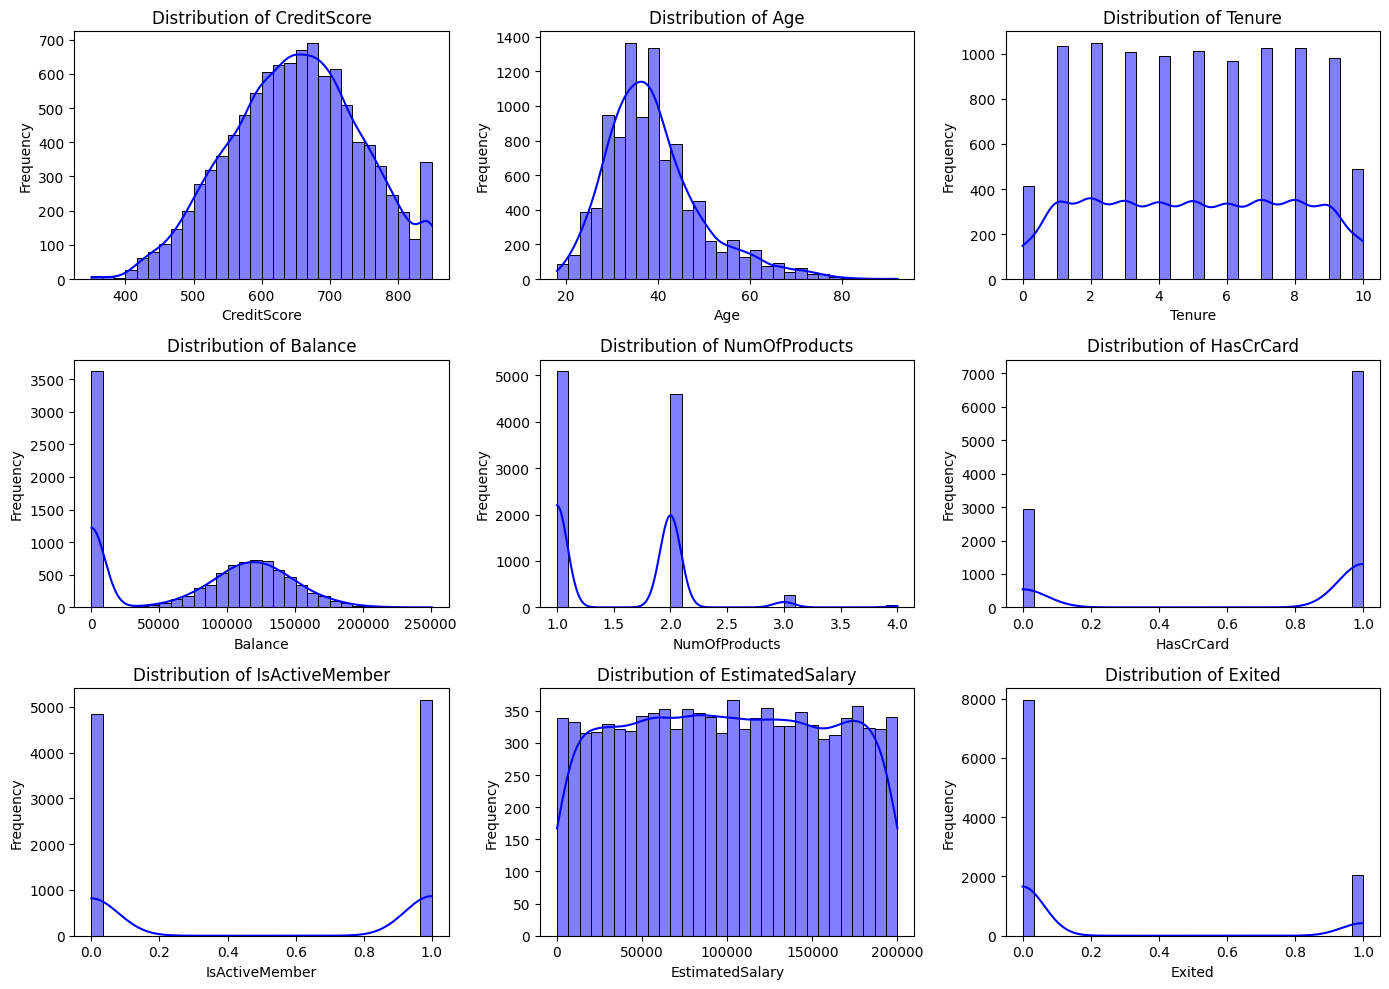

In [6]:
#Distribusi data numerik
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Menampilkan distribusi data untuk setiap kolom numerik
plt.figure(figsize=(14, 10))  # Ukuran figure
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)  # Membagi plot dalam grid 5x2
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Interpretasi DItribusi fitur numerik**

1. **CreditScore**
Distribusi **CreditScore** cenderung mendekati normal, dengan sebagian besar nasabah memiliki skor kredit dalam rentang menengah (600–700). Hanya sedikit nasabah yang memiliki skor sangat rendah (<400) atau sangat tinggi (>800), menunjukkan mayoritas nasabah memiliki kelayakan kredit yang cukup baik.

2. **Age**
Distribusi **Age** menunjukkan kemiringan ke kanan (*positively skewed*), di mana sebagian besar nasabah berada dalam kelompok usia muda hingga dewasa awal (20–40 tahun). Nasabah yang berusia lebih tua (>60 tahun) tercatat dalam jumlah yang jauh lebih sedikit.

3. **Tenure**
Distribusi **Tenure** bersifat diskrit dengan pola hampir merata di seluruh rentang (0–10 tahun), menunjukkan variasi dalam lama waktu nasabah menjadi pelanggan tanpa adanya dominasi pada durasi tertentu. Ini mengindikasikan keberagaman perilaku pelanggan dalam berlangganan.

4. **Balance**
Distribusi **Balance** sangat miring ke kanan, dengan mayoritas nasabah memiliki saldo mendekati nol. Namun, terdapat segelintir nasabah dengan saldo yang sangat tinggi, menggambarkan adanya kesenjangan yang signifikan dalam jumlah saldo antar nasabah.

5. **NumOfProducts**
Mayoritas nasabah memiliki **1 atau 2 produk**, sedangkan hanya sedikit nasabah yang memiliki **3 atau 4 produk**. Hal ini menunjukkan keterlibatan nasabah yang lebih rendah terhadap ragam produk yang ditawarkan.

6. **HasCrCard**
Sebagian besar nasabah tercatat memiliki kartu kredit (**nilai 1**), sementara sisanya tidak memiliki kartu kredit (**nilai 0**). Pola ini mengindikasikan dominasi penggunaan kartu kredit di kalangan nasabah.

7. **IsActiveMember**
Sebagian besar nasabah berstatus anggota aktif (**nilai 1**), meskipun terdapat jumlah yang signifikan dari nasabah tidak aktif (**nilai 0**). Ini menggambarkan tingkat keterlibatan yang beragam di antara nasabah.

8. **EstimatedSalary**
Distribusi **EstimatedSalary** cukup merata di seluruh rentang nilai (0–200.000), menunjukkan bahwa dataset mencakup nasabah dari berbagai kelompok pendapatan tanpa adanya dominasi dari kelompok tertentu.

9. **Exited (Label Target)**
Distribusi **Exited** memperlihatkan ketidakseimbangan kelas, dengan sebagian besar nasabah tetap menggunakan layanan (**nilai 0**) dan hanya sebagian kecil nasabah yang keluar (**nilai 1**). Hal ini menunjukkan tingkat churn yang relatif rendah dalam dataset.

### Distribusi data kategorik

<ipython-input-7-d767e6e52a5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')
<ipython-input-7-d767e6e52a5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


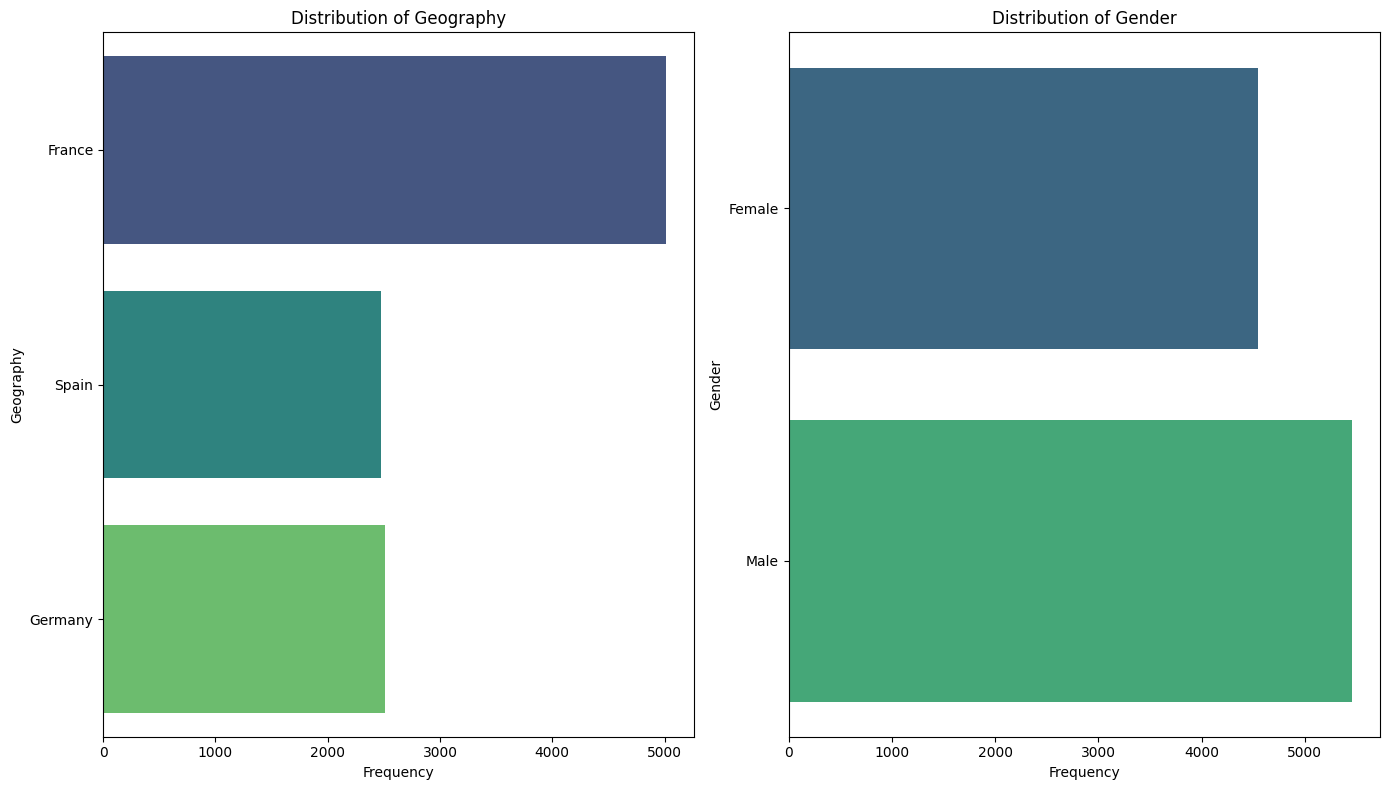

In [7]:
#Distribusi data kategorik
kategorik_columns = ['Geography', 'Gender']

# Menampilkan distribusi data untuk setiap kolom kategorik
plt.figure(figsize=(14, 8))  # Ukuran figure
for i, col in enumerate(kategorik_columns):
    plt.subplot(1, 2, i + 1)  # Membagi plot dalam grid 5x2
    sns.countplot(data[col], palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('Frequency')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Interpretasi Distribusi:

1. **Distribusi Geography**  
Mayoritas data dalam kolom **Geography** berasal dari **France**, dengan jumlah lebih dari 4.000 data poin.  
Sementara itu, jumlah data dari **Spain** sekitar setengah dari France, dan data dari **Germany** sedikit lebih rendah dibandingkan dengan Spain.

2. **Distribusi Gender**  
Pada kolom **Gender**, jumlah **laki-laki (Male)** sedikit lebih banyak dibandingkan dengan **perempuan (Female)**.  
Namun, selisihnya tidak terlalu besar, karena masing-masing kategori memiliki sekitar 4.000 data poin.

### Distribusi target

<ipython-input-8-1712f552946e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited", data=data, palette="viridis")


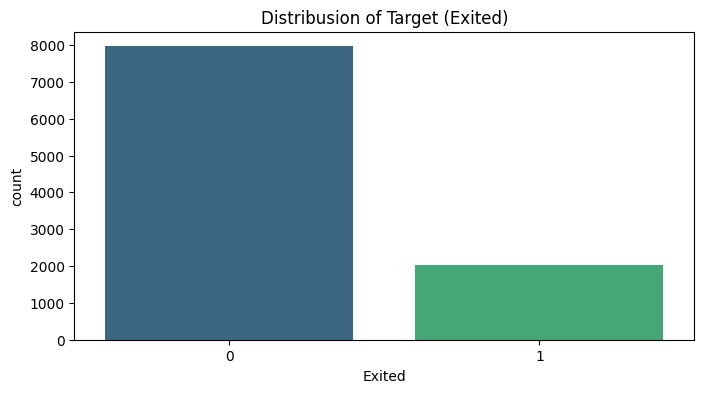

In [8]:
#Visualisasi ditribusi Target
plt.figure(figsize=(8, 4))
sns.countplot(x="Exited", data=data, palette="viridis")
plt.title('Distribusion of Target (Exited)')
plt.show()

Visualisasi menunjukkan distribusi variabel target "Exited" (keluar/tidaknya nasabah). Jumlah nasabah yang tidak keluar (0) jauh lebih banyak daripada yang keluar (1)

## Berapa persentase nasabah yang churn dan yang tetap menggunakan layanan aktif?

In [9]:
#persentase churn
churn_counts = data['Exited'].value_counts(normalize=True) * 100
print("Persentase Nasabah:")
print(churn_counts)

Persentase Nasabah:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


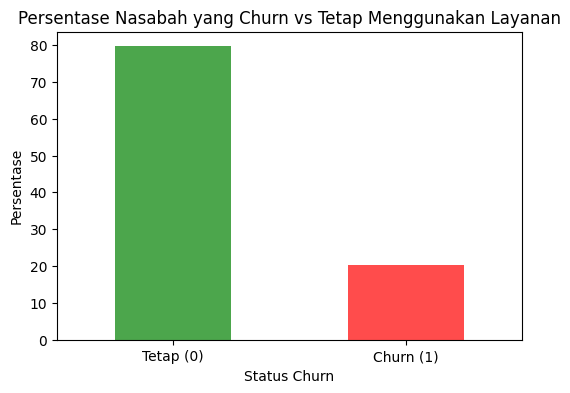

In [10]:
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Persentase Nasabah yang Churn vs Tetap Menggunakan Layanan')
plt.xticks(ticks=[0, 1], labels=['Tetap (0)', 'Churn (1)'], rotation=0)
plt.ylabel('Persentase')
plt.xlabel('Status Churn')
plt.show()


Hasil visualisasi yang menunjukkan persentase nasabah berdasarkan status churn (Exited) adalah sebagai berikut:

* 79.63% nasabah tetap menggunakan layanan (nilai 0 pada kolom Exited). Artinya, sebagian besar nasabah dalam dataset tidak keluar atau churn dari layanan.
* 20.37% nasabah churn atau keluar dari layanan (nilai 1 pada kolom Exited). Ini menunjukkan bahwa hanya sebagian kecil nasabah yang berhenti menggunakan layanan.

## Apakah ada pola tertentu pada nasabah churn berdasarkan jenis kelamin?

In [11]:
# 2. Pola churn berdasarkan jenis kelamin
churn_by_gender = data.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)
churn_by_gender_percentage = churn_by_gender.div(churn_by_gender.sum(axis=1), axis=0) * 100
print("\nPersentase Churn Berdasarkan Jenis Kelamin:")
print(churn_by_gender_percentage)


Persentase Churn Berdasarkan Jenis Kelamin:
Exited          0          1
Gender                      
Female  74.928461  25.071539
Male    83.544072  16.455928


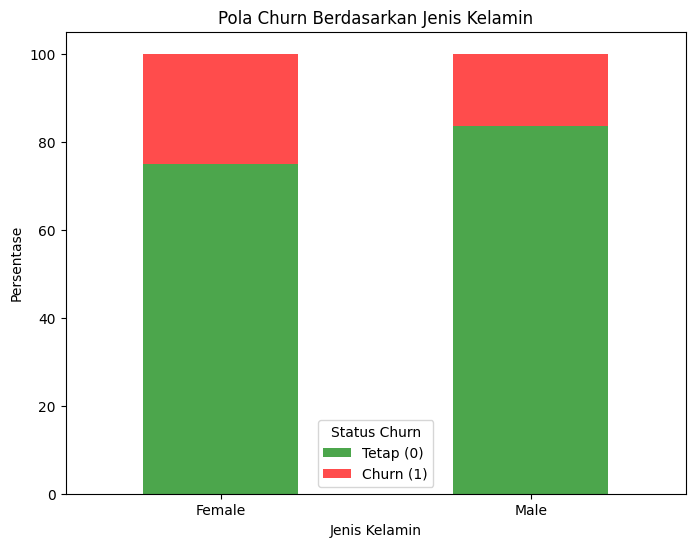

In [12]:
# Visualisasi pola churn berdasarkan jenis kelamin
churn_by_gender_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'], alpha=0.7)
plt.title('Pola Churn Berdasarkan Jenis Kelamin')
plt.ylabel('Persentase')
plt.xlabel('Jenis Kelamin')
plt.xticks(rotation=0)
plt.legend(['Tetap (0)', 'Churn (1)'], title='Status Churn')
plt.show()

Interpretasi:

1. Perbedaan Antara Gender:

  * Lebih banyak pria yang tetap menggunakan layanan dibandingkan wanita (83.54% vs 74.93%).
  * Lebih banyak wanita yang keluar dari layanan dibandingkan pria (25.07% vs 16.46%).

2. Peluang untuk Retensi Berdasarkan Jenis Kelamin:

  * Untuk wanita, tingkat churn lebih tinggi, sehingga mungkin perlu ada pendekatan yang lebih spesifik untuk mempertahankan nasabah wanita.
  * Pria menunjukkan tingkat churn yang lebih rendah, yang dapat menjadi indikasi bahwa mereka lebih puas dengan layanan atau mungkin memiliki kebutuhan yang lebih kuat terkait produk yang ditawarkan.


Data ini bisa menjadi dasar untuk merancang strategi retensi yang lebih terfokus, seperti program loyalitas khusus untuk wanita atau penawaran yang lebih menarik.

## Heatmap

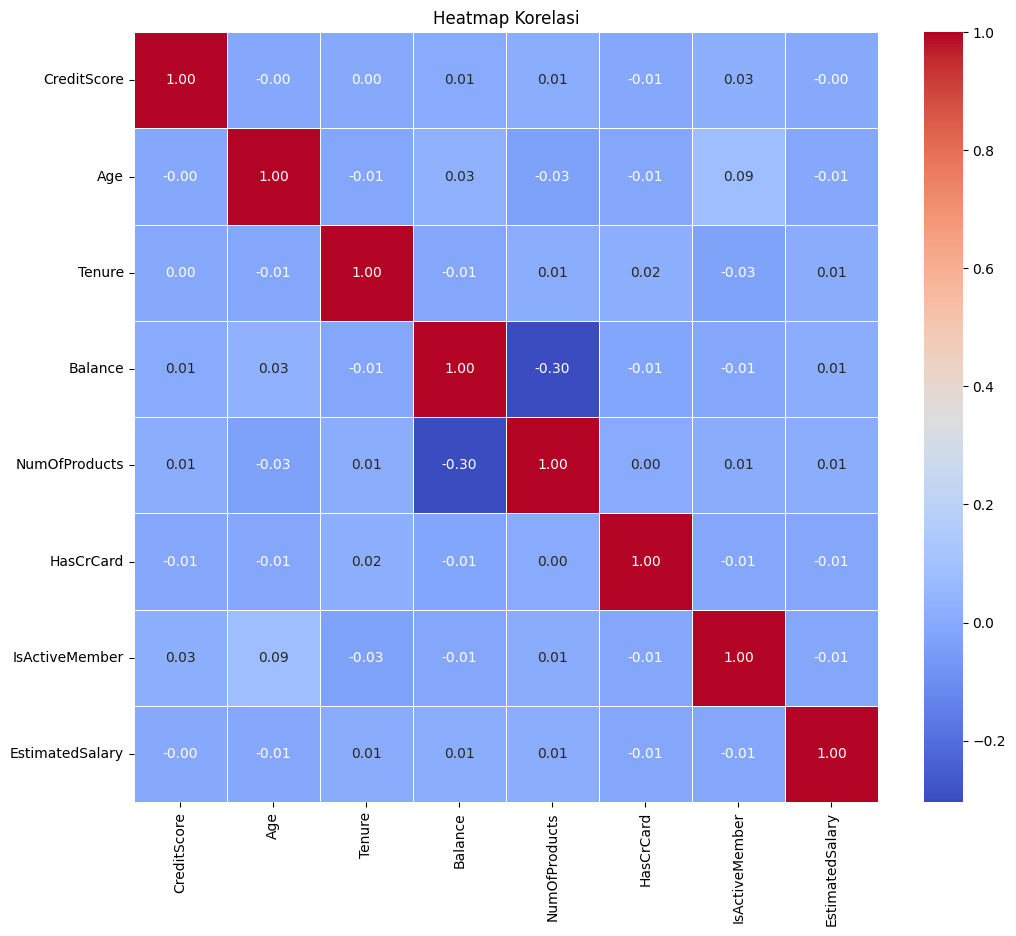

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik, kecualikan target 'Exited'
numerical_columns = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Exited'])

# Hitung korelasi antar kolom numerik
correlation = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Heatmap Korelasi")
plt.show()




**Heatmap Korelasi**

digunakan untuk melihat seberapa kuat hubungan antar variabel numerik dalam dataset. Dengan heatmap, kita bisa langsung melihat apakah ada hubungan yang kuat atau lemah antara dua variabel berdasarkan warna dan angka yang ditampilkan:

- **Warna Merah**: Menandakan **hubungan positif** antara dua variabel. Semakin merah warnanya, semakin kuat hubungan tersebut (mendekati angka 1).
- **Warna Biru**: Menandakan **hubungan negatif** antara dua variabel. Semakin biru warnanya, semakin kuat hubungan negatif tersebut (mendekati angka -1).
- **Warna Putih/Netral**: Menandakan **tidak ada hubungan** atau hubungan yang sangat lemah antara dua variabel (mendekati angka 0).
- **Angka dalam Kotak**: Merupakan **nilai korelasi** itu sendiri, yang menunjukkan seberapa kuat atau lemah hubungan antara dua variabel.

**Penjelasan Hasil dari Heatmap:**

- **Diagonal Utama (Nilai 1.00)**: Diagonal ini selalu bernilai 1 karena itu menunjukkan hubungan suatu variabel dengan dirinya sendiri.
- **Korelasi Antar Fitur**: Kebanyakan fitur tidak memiliki korelasi yang kuat satu sama lain, ditunjukkan oleh warna putih atau netral. Namun, ada beberapa korelasi yang sedikit lebih mencolok, seperti:
  - **Balance dan NumOfProducts (-0.30)**: Ada korelasi negatif lemah antara saldo nasabah dan jumlah produk yang dimiliki. Nasabah dengan saldo lebih tinggi cenderung memiliki lebih sedikit produk.




## cek multikolinearitas

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Pilih hanya kolom numerik, kecualikan target 'Exited'
numerical_columns = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Exited'])

# Tambahkan konstanta (intercept) untuk menghitung VIF
X = add_constant(numerical_columns)

# Hitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Tampilkan hasil VIF
print(vif_data)


           Feature        VIF
0            const  80.234130
1      CreditScore   1.000984
2              Age   1.009028
3           Tenure   1.001666
4          Balance   1.103281
5    NumOfProducts   1.103382
6        HasCrCard   1.001088
7   IsActiveMember   1.009289
8  EstimatedSalary   1.000853


Dari hasil diatas Dengan nilai VIF yang sangat rendah (sekitar 1), ini menunjukkan bahwa tidak ada masalah multikolinearitas antara fitur-fitur numerik dalam dataset.

# 4.Data Preparation

## mising value

In [15]:
data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## duplikasi data

In [16]:
# Cek data duplikat
duplicate_data = data.duplicated().sum()
duplicate_data

0

##  split data diawal untuk mencegah kebocoran data


In [17]:
# import library
from sklearn.model_selection import train_test_split

# Pisahkan fitur (x) dan target (y)
X = data.drop(columns=["Exited"])
y = data["Exited"]

# Split data menjadi set pelatihan untuk set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(7000, 10), y_train=(7000,)
Test set shape: X_test=(3000, 10), y_test=(3000,)


dilakukan pembagian data train dan test diawal dengan tujuan untuk memiminalisir kebocoran data di data train. dengan proporsi 80% data train dan 20% data latih

## Outlier

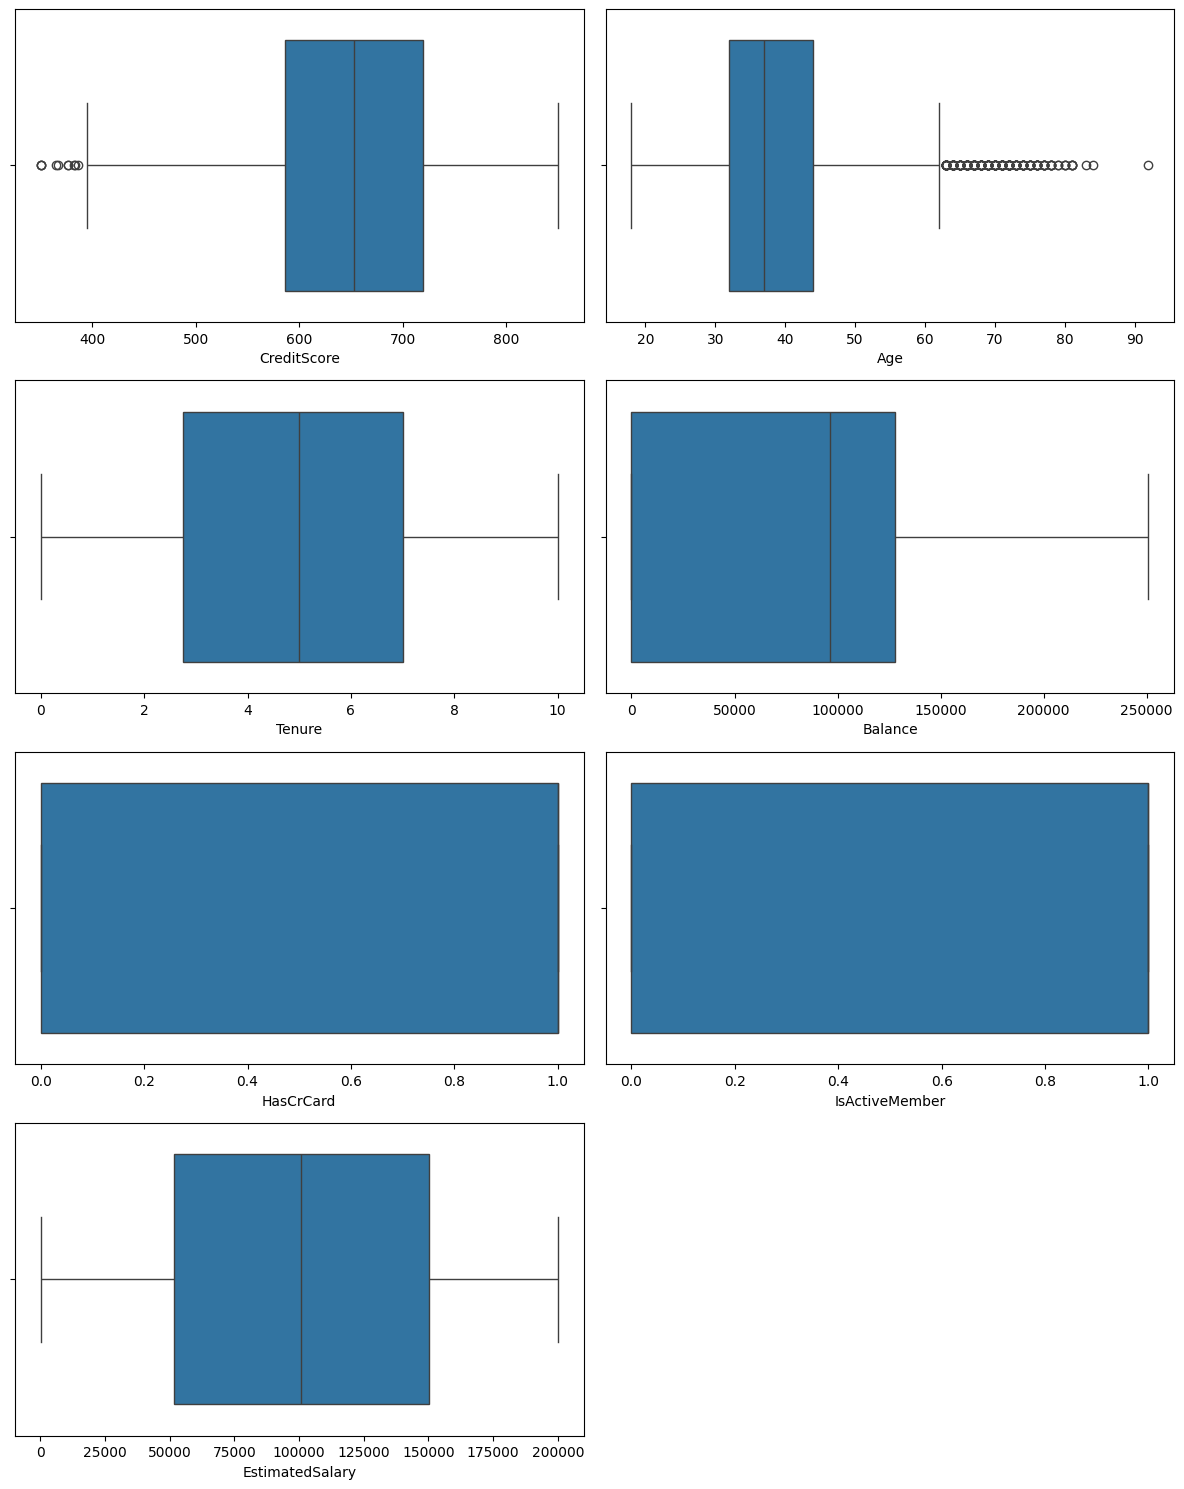

In [18]:
# Visualisasi menggunakan box plot untuk mendeteksi outlier pada data
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

# Plot setiap kolom numerik
sns.boxplot(data=X_train, x='CreditScore', ax=axes[0, 0])
sns.boxplot(data=X_train, x='Age', ax=axes[0, 1])
sns.boxplot(data=X_train, x='Tenure', ax=axes[1, 0])
sns.boxplot(data=X_train, x='Balance', ax=axes[1, 1])
sns.boxplot(data=X_train, x='HasCrCard', ax=axes[2, 0])
sns.boxplot(data=X_train, x='IsActiveMember', ax=axes[2, 1])
sns.boxplot(data=X_train, x='EstimatedSalary', ax=axes[3, 0])

# Buang subplot kosong yang tidak digunakan
fig.delaxes(axes[3, 1])

# Tampilkan plot
plt.tight_layout()
plt.show()


dari visualisasi diatas terdapat outlier pada column age dan creditscore yang kemudian akan di handling menggunakan metoide iqr untuk merubah ambang batasnya

In [19]:
# Handling outlier
# Daftar fitur yang akan digunakan untuk memeriksa jumlah outlier

features = X_train.select_dtypes(include=['int64', 'float64'])

# Loop over each feature to calculate the IQR and cap outliers
for feature in features:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    X_train[feature] = np.where(X_train[feature] < lower_bound, lower_bound, X_train[feature])
    X_train[feature] = np.where(X_train[feature] > upper_bound, upper_bound, X_train[feature])

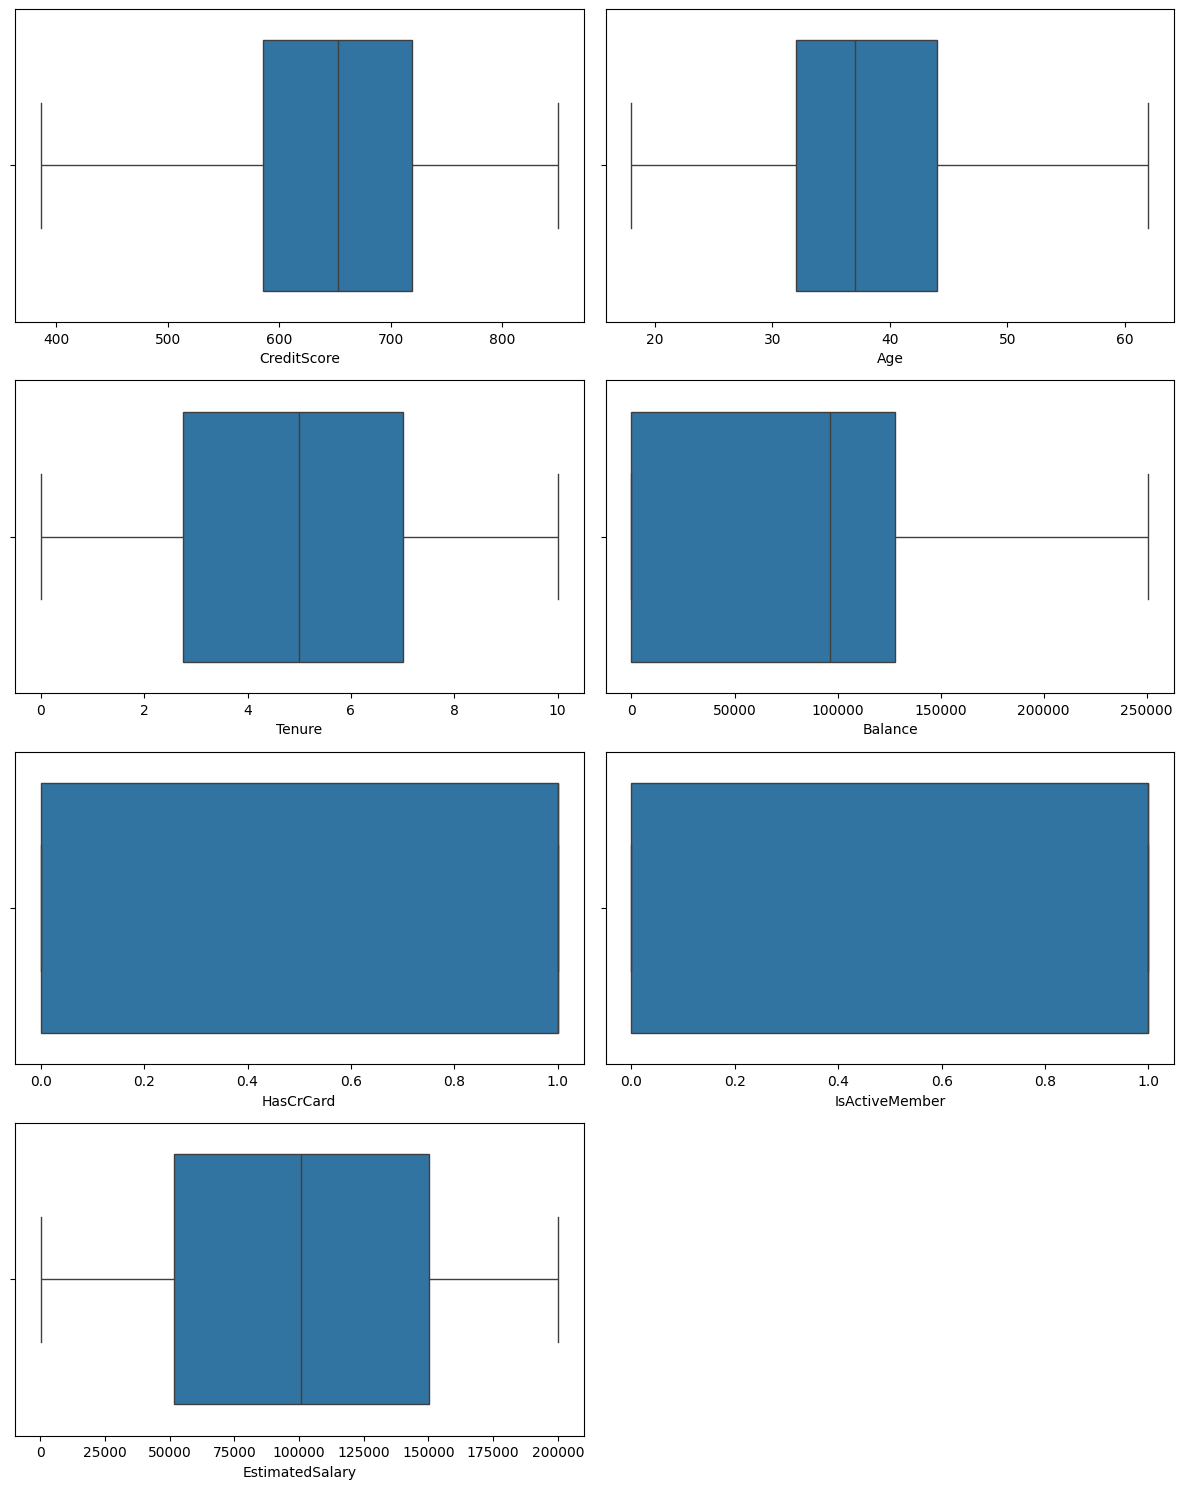

In [20]:
# Visualisasi menggunakan box plot untuk mendeteksi outlier pada data
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

# Plot setiap kolom numerik
sns.boxplot(data=X_train, x='CreditScore', ax=axes[0, 0])
sns.boxplot(data=X_train, x='Age', ax=axes[0, 1])
sns.boxplot(data=X_train, x='Tenure', ax=axes[1, 0])
sns.boxplot(data=X_train, x='Balance', ax=axes[1, 1])
sns.boxplot(data=X_train, x='HasCrCard', ax=axes[2, 0])
sns.boxplot(data=X_train, x='IsActiveMember', ax=axes[2, 1])
sns.boxplot(data=X_train, x='EstimatedSalary', ax=axes[3, 0])

# Buang subplot kosong yang tidak digunakan
fig.delaxes(axes[3, 1])

# Tampilkan plot
plt.tight_layout()
plt.show()


data undah bersih dari outlier

## Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

#label encoding untuk gender
label_encoder = LabelEncoder()
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = label_encoder.fit_transform(X_test['Gender'])

#one hot encoding geography
X_train = pd.get_dummies(X_train, columns=['Geography'])
X_test = pd.get_dummies(X_test, columns=['Geography'])

X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9069,619.0,0,32.0,4.0,175406.13,2.0,1.0,1.0,172792.43,False,False,True
2603,643.0,0,34.0,7.0,160426.07,1.0,0.0,1.0,188533.11,False,True,False
7738,561.0,1,33.0,6.0,0.00,2.0,0.0,0.0,173680.39,True,False,False
1579,618.0,1,41.0,8.0,37702.79,1.0,1.0,1.0,195775.48,False,True,False
5058,714.0,1,37.0,9.0,148466.93,2.0,0.0,1.0,151280.96,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768.0,1,54.0,8.0,69712.74,1.0,1.0,1.0,69381.05,True,False,False
5191,682.0,0,58.0,1.0,0.00,1.0,1.0,1.0,706.50,True,False,False
5390,735.0,0,38.0,1.0,0.00,3.0,0.0,0.0,92220.12,True,False,False
860,667.0,1,43.0,8.0,190227.46,1.0,1.0,0.0,97508.04,True,False,False


melakukan encoding pada variabel kategorikal. digunakan 2 metode yang berbeda dikarenakan geography adalah data nominal maka metode yang paling tepat adalah one hot encoding, sedangkan gender adalah data noiominal juga tetapi karna 2 value label encoder juga tepat digunakan

# 5.feature Engineering

## scaling fitur

In [22]:
from sklearn import preprocessing
import pandas as pd

columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = preprocessing.MinMaxScaler()

X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


print(X_train_scaled_df.head())

      CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
9069     0.502021       0  0.318182     0.4  0.699113            0.4   
2603     0.553759       0  0.363636     0.7  0.639407            0.0   
7738     0.376987       1  0.340909     0.6  0.000000            0.4   
1579     0.499865       1  0.522727     0.8  0.150271            0.0   
5058     0.706818       1  0.431818     0.9  0.591742            0.4   

      HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
9069        1.0             1.0         0.864027             False   
2603        0.0             1.0         0.942778             False   
7738        0.0             0.0         0.868470              True   
1579        1.0             1.0         0.979011             False   
5058        0.0             1.0         0.756406              True   

      Geography_Germany  Geography_Spain  
9069              False             True  
2603               True            False  
7738             

In [23]:
# Mengubah kolom bool menjadi int
X_test_scaled_df = X_test_scaled_df.astype({'Geography_France': 'int',
                                            'Geography_Germany': 'int',
                                            'Geography_Spain': 'int',})

# Mengubah kolom bool menjadi int
X_test_scaled_df = X_test_scaled_df.astype({'Geography_France': 'int',
                                            'Geography_Germany': 'int',
                                            'Geography_Spain': 'int',})
X_test_scaled_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
6252,0.452439,1,0.318182,0.3,0.385452,0.4,0,0,0.208616,0,1,0
4684,0.510644,1,0.568182,0.1,0.000000,0.4,1,1,0.731883,1,0,0
1731,0.463217,0,0.590909,0.4,0.000000,0.4,1,0,0.292531,0,0,1
4742,0.258421,1,0.931818,0.8,0.474902,0.4,1,1,0.853458,0,1,0
4521,0.374832,0,0.204545,0.7,0.498194,0.0,1,1,0.573241,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8014,0.743465,0,0.477273,0.2,0.505449,0.0,1,1,0.374027,0,0,1
1074,0.320938,0,0.295455,0.7,0.445819,0.4,1,1,0.181052,1,0,0
3063,0.480463,1,0.318182,0.7,0.286460,0.0,1,1,0.759627,1,0,0
6487,0.417947,1,0.295455,0.2,0.000000,0.4,0,1,0.319812,1,0,0


menubah dtype bool pada kolom geography menjadi numerik

#  6.modeling

## Model Machine Learning

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train_scaled_df, y_train)
dt = DecisionTreeClassifier().fit(X_train_scaled_df, y_train)
rf = RandomForestClassifier().fit(X_train_scaled_df, y_train)
nb = GaussianNB().fit(X_train_scaled_df, y_train)
svm = SVC().fit(X_train_scaled_df, y_train)

print(f"Model training selesai")


Model training selesai


In [25]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kasus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        "Confusion Matrix" : cm,
        "True Postive (TP)" : tp,
        "False Positive (FP)" : fp,
        "False Negative (FN)" : fn,
        "True Negative (TN)" : tn,
        "Accuracy" : accuracy_score(y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred),
        "Recall" : recall_score(y_test, y_pred),
        "F1-Score" : f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model
results = {
    "K-Nearest Neighbors (KNN)" : evaluate_model(knn, X_test_scaled_df, y_test),
    "Decision Tree (DT)" : evaluate_model(dt, X_test_scaled_df, y_test),
    "Random Forest (RF)" : evaluate_model(rf, X_test_scaled_df, y_test),
    "Naive Bayes (NB)" : evaluate_model(nb, X_test_scaled_df, y_test),
    "Support Vector Machine (SVM)" : evaluate_model(svm, X_test_scaled_df, y_test)
}

# Buat Dataframe untuk meringkas hasil
summary_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1_Score"])

# Isi dataframe dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        "Model": model_name,
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-Score": metrics["F1-Score"]
    })

# Konversi daftar kamus ke dataframe
summary_df = pd.DataFrame(rows)

# Tampilkan dataframe
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.827667,0.601824,0.339041,0.433735
1,Decision Tree (DT),0.808000,0.506601,0.525685,0.515966
2,Random Forest (RF),0.872667,0.785311,0.476027,0.592751
3,Naive Bayes (NB),0.814667,0.532407,0.393836,0.452756
4,Support Vector Machine (SVM),0.857000,0.844444,0.325342,0.469716


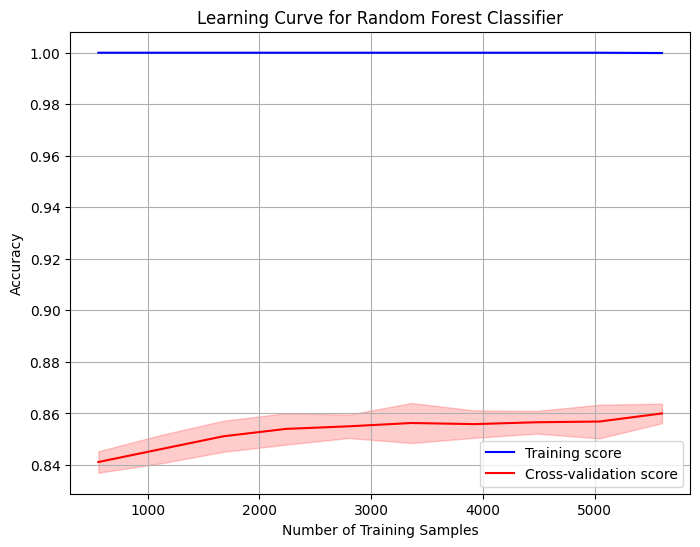

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Fungsi untuk menggambar learning curve
def plot_learning_curve(model, X_train, y_train):
    # Menentukan parameter untuk learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Menghitung rata-rata dan standar deviasi dari skor pelatihan dan pengujian
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training score", color="blue")
    plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")

    # Plot standar deviasi
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

    # Tambahkan label dan judul
    plt.title("Learning Curve for Random Forest Classifier")
    plt.xlabel("Number of Training Samples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Menggambar learning curve untuk Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
plot_learning_curve(rf, X_train_scaled_df, y_train)


## MLP (Deep Learning)

In [41]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model with more regularization and dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled_df.shape[1],),kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate= 2e-3)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 28,801 (112.50 KB)

 Non-trainable params: 256 (1.00 KB)

In [42]:
# Add callbacks for early stopping and learning rate scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [44]:
# Train the model
history = model.fit(
    X_train_scaled_df,
    y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7416 - auc_4: 0.5601 - loss: 0.5936 - val_accuracy: 0.7948 - val_auc_4: 0.7331 - val_loss: 0.5811 - learning_rate: 0.0020
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7941 - auc_4: 0.7059 - loss: 0.4975 - val_accuracy: 0.7948 - val_auc_4: 0.7632 - val_loss: 0.5933 - learning_rate: 0.0020
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8099 - auc_4: 0.7422 - loss: 0.4667 - val_accuracy: 0.8086 - val_auc_4: 0.7804 - val_loss: 0.6046 - learning_rate: 0.0020
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8145 - auc_4: 0.7662 - loss: 0.4584 - val_accuracy: 0.8076 - val_auc_4: 0.7889 - val_loss: 0.5616 - learning_rate: 0.0020
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8175 - auc_4: 0.7826 - loss: 0.4388 - val_accuracy: 0.8143 - val_auc_4: 0.7921 - val_loss: 0.5413 - learning_rate: 0.0020
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accura

In [45]:
# Evaluasi model
results = model.evaluate(X_test_scaled_df, y_test)

# Menampilkan hasil evaluasi
print(f"Test Accuracy: {results[1]:.2f}")
print(f"Test AUC: {results[2]:.2f}")

# Menampilkan loss dan val_loss dari history
loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"Training Loss: {loss[-1]:.4f}")
print(f"Validation Loss: {val_loss[-1]:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - auc_4: 0.8585 - loss: 0.3480
Test Accuracy: 0.86
Test AUC: 0.86
Training Loss: 0.3403
Validation Loss: 0.3611


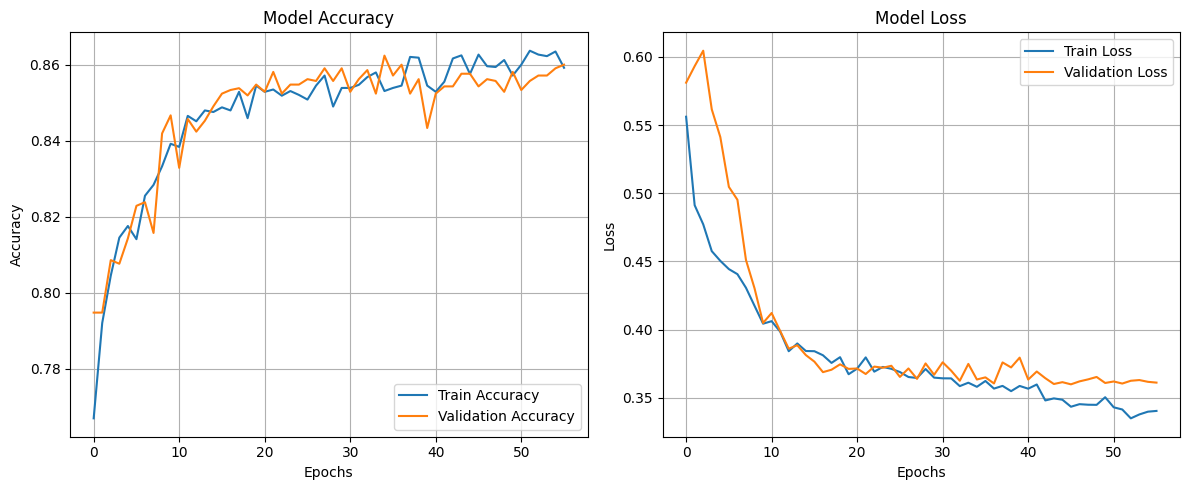

In [46]:
# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

# 7.Kesimpulan Model MLP dan Perbandingan dengan Model ML Lainnya

#### **Model Multi-Layer Perceptron (MLP):**
1. **Performansi pada Data Validasi dan Pengujian:**
   - **Akurasi Validasi:** 86.20%
   - **AUC Validasi:** 85.85%
   - **Loss Validasi:** 0.3611
   - **Akurasi Pengujian:** 86.00%
   - **AUC Pengujian:** 86.00%
   - **Loss Pelatihan:** 0.3403

2. **Analisis Kinerja MLP:**
   - **Kelebihan:** Model MLP menunjukkan kinerja yang konsisten baik pada data validasi maupun data pengujian, dengan akurasi dan AUC di kisaran 86%. Ini menunjukkan kemampuan generalisasi model yang baik tanpa overfitting yang signifikan.
   - **Kekurangan:** Meskipun akurasi tinggi, AUC sedikit di bawah angka optimal (90%), menunjukkan bahwa model memiliki ruang untuk perbaikan dalam membedakan kelas positif dan negatif.

---

#### **Perbandingan dengan Model ML Lainnya:**

| **Model**                 | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|----------------------------|--------------|---------------|------------|--------------|
| **K-Nearest Neighbors (KNN)** | 82.77%       | 60.18%        | 33.90%     | 43.37%       |
| **Decision Tree (DT)**       | 80.80%       | 50.66%        | 52.57%     | 51.60%       |
| **Random Forest (RF)**       | **87.27%**   | 78.53%        | 47.60%     | 59.27%       |
| **Naive Bayes (NB)**         | 81.47%       | 53.24%        | 39.38%     | 45.28%       |
| **Support Vector Machine (SVM)** | 85.70%       | **84.44%**    | 32.53%     | 46.97%       |
| **Multi-Layer Perceptron (MLP)** | **86.20%**   | -             | -          | -            |

1. **Random Forest (RF)**:
   - Memiliki akurasi tertinggi (87.27%) tetapi F1-Score relatif rendah (59.27%). Hal ini disebabkan oleh ketidakseimbangan antara precision dan recall.

2. **Support Vector Machine (SVM)**:
   - Precision tertinggi (84.44%), tetapi recall sangat rendah (32.53%), yang menunjukkan model kesulitan dalam menangkap kelas minoritas.

3. **MLP vs. RF & SVM**:
   - **Kelebihan:** MLP menunjukkan performa keseluruhan yang lebih seimbang dibandingkan RF dan SVM dengan akurasi dan AUC yang tinggi, serta tanpa masalah precision-recall trade-off yang mencolok.
   - **Kekurangan:** MLP memerlukan waktu pelatihan lebih lama dibandingkan RF dan SVM karena sifat model neural network.

---

#### **Kesimpulan Akhir:**
- **MLP** menjadi pilihan yang sangat baik untuk model dengan generalisasi yang kuat, mengingat akurasi, AUC, dan konsistensinya dalam data validasi dan pengujian.

In [47]:
#simpan model
model.save("churn_prediction.keras")
model.save("churn_prediction.h5")